### This notebook demonstrates the search feature in MLFlow with different search queries

In [1]:
import mlflow
import numpy as np

Let's start a guide experiment

In [2]:
mlflow.set_experiment("search-run-guide")

2025/05/08 15:42:55 INFO mlflow.tracking.fluent: Experiment with name 'search-run-guide' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/Heba/Personal/MLOps%20Prep/through_session/mlflow/part%201%20-%20tracking%20methods/mlruns/407187995575443519', creation_time=1746708175462, experiment_id='407187995575443519', last_update_time=1746708175462, lifecycle_stage='active', name='search-run-guide', tags={}>

And now have a dummy run.

In [3]:
accuracy = np.arange(0, 1, 0.1)
loss = np.arange(1, 0, -0.1)
log_scale_loss = np.log(loss)
f1_score = np.arange(0, 1, 0.1)

batch_size = [2] * 5 + [4] * 5
learning_rate = [0.001, 0.01] * 5
model = ["GPT-2", "GPT-3", "GPT-3.5", "GPT-4"] + [None] * 6

task = ["classification", "regression", "causal lm"] + [None] * 7
environment = ["notebook"] * 5 + [None] * 5

dataset_name = ["custom"] * 5 + ["also custom"] * 5
dataset_digest = ["s8ds293b", "jks834s2"] + [None] * 8
dataset_context = ["train"] * 5 + ["test"] * 5

for i in range(10):
    with mlflow.start_run():
        mlflow.log_metrics(
            {
                "loss": loss[i],
                "accuracy": accuracy[i],
                "log-scale-loss": log_scale_loss[i],
                "f1 score": f1_score[i],
            }
        )

        mlflow.log_params(
            {
                "batch_size": batch_size[i],
                "learning rate": learning_rate[i],
                "model": model[i],
            }
        )

        mlflow.set_tags(
            {
                "task": task[i],
                "environment": environment[i],
            }
        )

        dataset = mlflow.data.from_numpy(
            features=np.random.uniform(size=[20, 28, 28, 3]),
            targets=np.random.randint(0, 10, size=[20]),
            name=dataset_name[i],
            digest=dataset_digest[i],
        )
        mlflow.log_input(dataset, context=dataset_context[i])

This is how the UI is expected to look like.

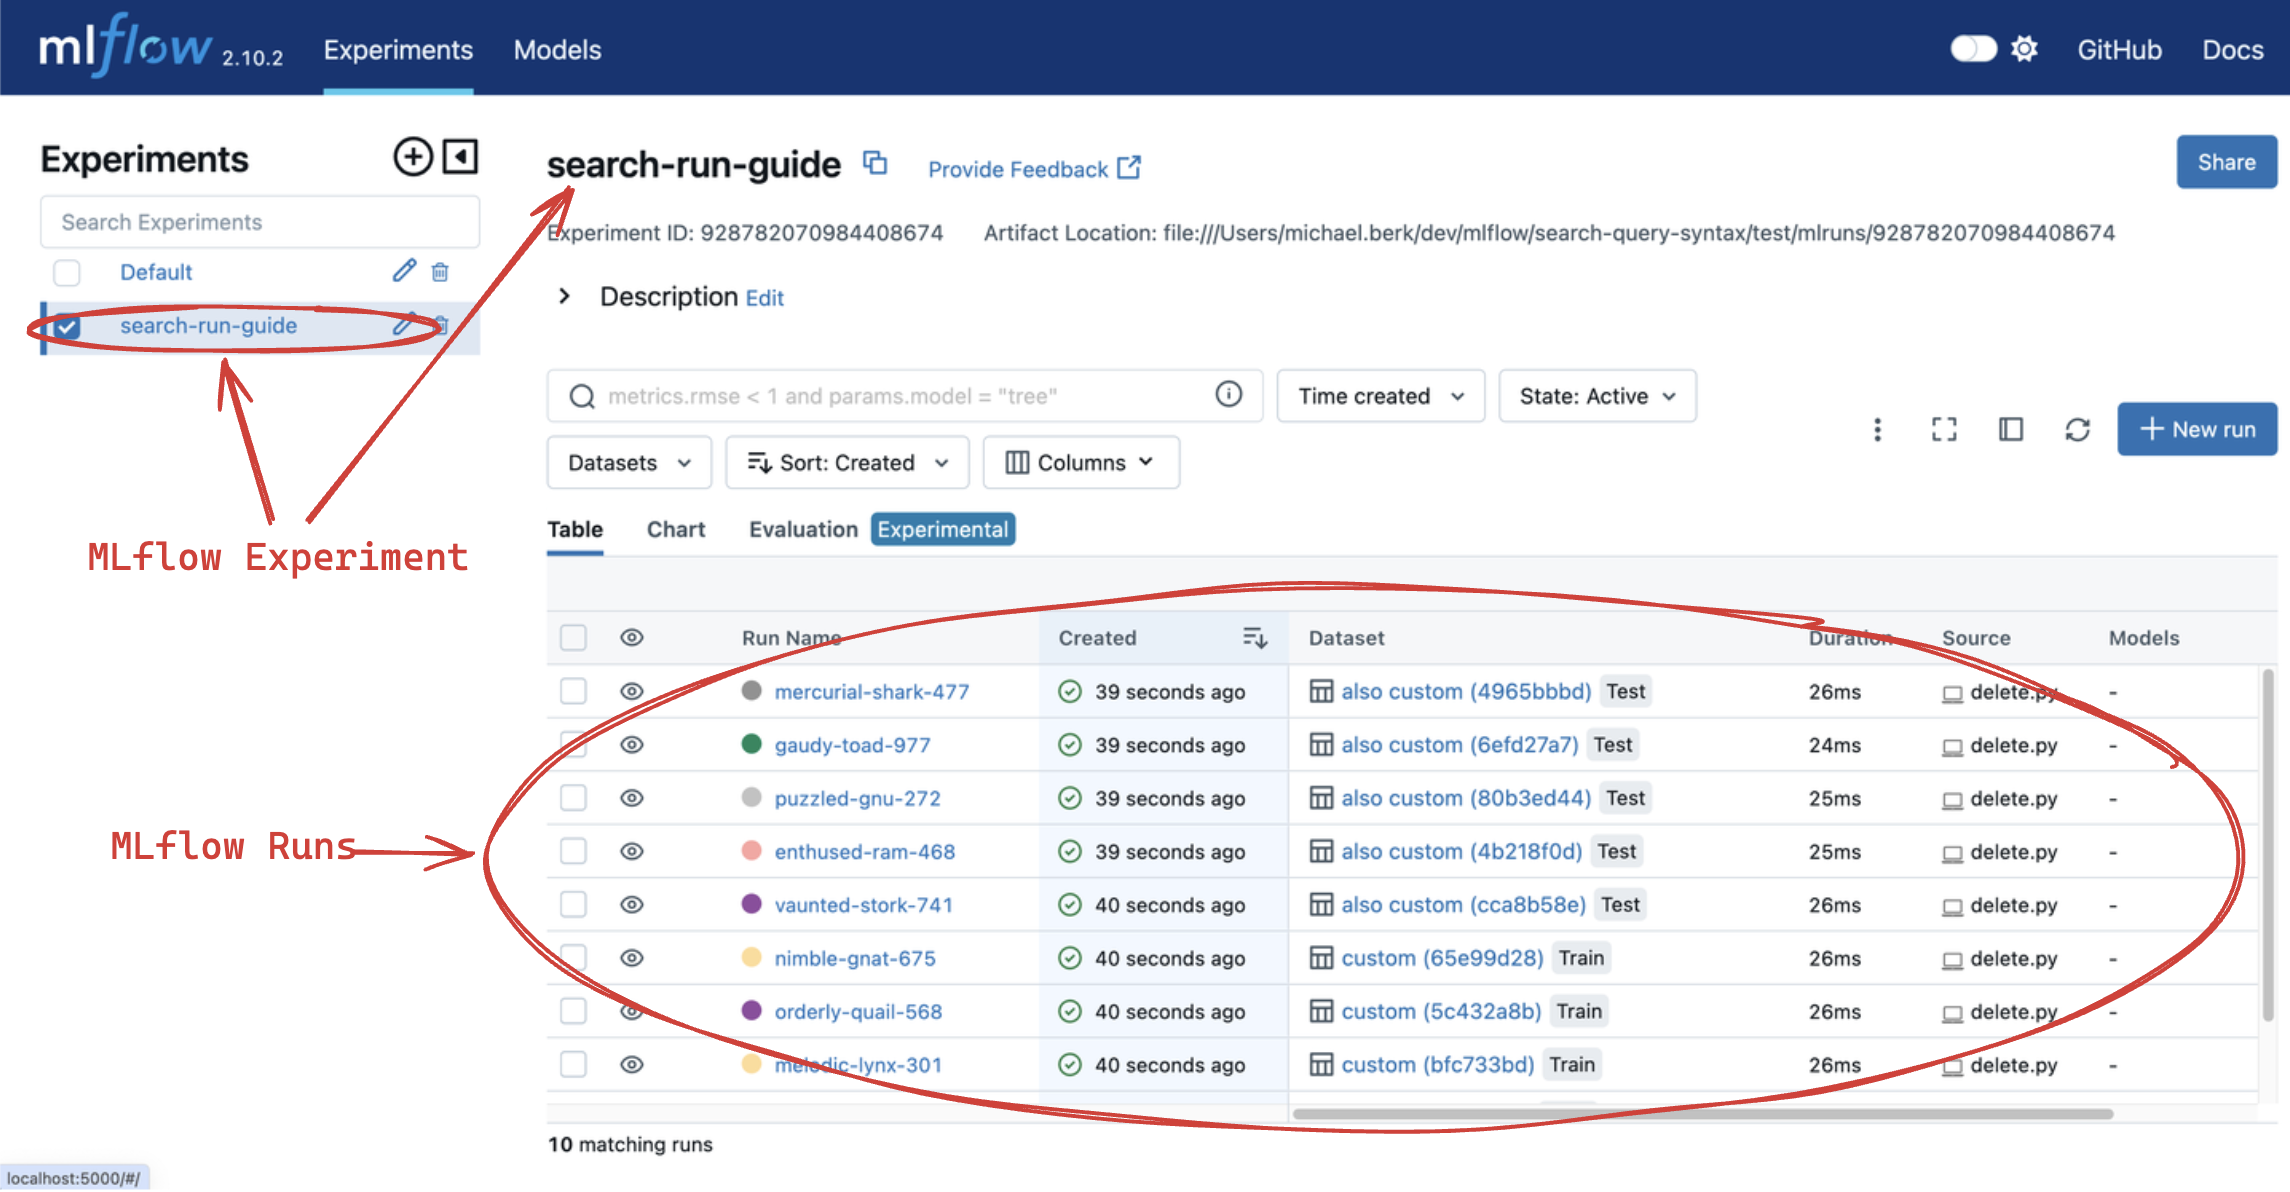

# Search Query Example

Visual Representation of Search Components:

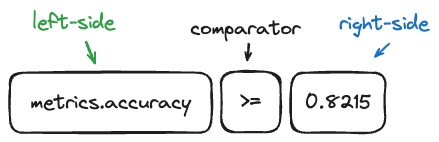

Valid Syntax for Left and Right Side Elements:

1. Left Side Syntax:

    - Fields without special characters or reserved keywords can be referenced directly (e.g., tag.test).
    - Use backticks for fields that contain special characters or are reserved keywords.
    - Double quotes are also acceptable for enclosing field names (e.g., tag."test").

    - **Unsupported**:
        - Single quotes are not valid for enclosing field names (e.g., tag.'test' results in a syntax error).

2. Right Side Syntax:

    - Enclose values in single or double quotes based on content requirements (e.g., tag.\`test\` = 'abc' or tag.\`test\` = "abc").
    - Non-metric values, including numeric values that may be stored as tags or as parameters must be enclosed in quotations.

    - **Unsupported**:
        - Using backticks or no wrapping for values is not allowed. Examples of invalid syntax include: tag.\`test\` = \`abc\`


In [4]:
all_runs = mlflow.search_runs(search_all_experiments=True)
print(all_runs)

                              run_id       experiment_id    status  \
0   9d0a7208356546bd851e6ace3d0d1d8f  407187995575443519  FINISHED   
1   75d4ece8ac474fc4acf5fe46c285471d  407187995575443519  FINISHED   
2   9935b73d44e344f0a05df65101103c22  407187995575443519  FINISHED   
3   23adc467a88849249da7a35eda88813d  407187995575443519  FINISHED   
4   07ec22e3bbb544b4be043cd8567efb17  407187995575443519  FINISHED   
5   b69aae980620455aaa7c2eeee5c3334c  407187995575443519  FINISHED   
6   45d18748d723477fba9b0208d3c80a3f  407187995575443519  FINISHED   
7   4f68b88bc3e245fca4c956f12a939762  407187995575443519  FINISHED   
8   fe2d3273d44340fb9904cb9e45e78162  407187995575443519  FINISHED   
9   35f96552bb7041bf80fc09c7aa4bf499  407187995575443519  FINISHED   
10  25b027669ff5402494e308d9cf7c7ca7  107041076032827412  FINISHED   
11  ba0581cd22dd47c49b2db707e68e051a  107041076032827412  FINISHED   
12  2ef68757e061430b9691f08c492bb16f  107041076032827412  FINISHED   
13  bd4209c420a44040

In [5]:
bad_runs = mlflow.search_runs(
    filter_string="metrics.loss > 0.8", search_all_experiments=True
)
print(bad_runs)

                             run_id       experiment_id    status  \
0  fe2d3273d44340fb9904cb9e45e78162  407187995575443519  FINISHED   
1  35f96552bb7041bf80fc09c7aa4bf499  407187995575443519  FINISHED   

                                        artifact_uri  \
0  file:///d:/Heba/Personal/MLOps%20Prep/through_...   
1  file:///d:/Heba/Personal/MLOps%20Prep/through_...   

                        start_time                         end_time  \
0 2025-05-08 12:42:56.996000+00:00 2025-05-08 12:42:57.045000+00:00   
1 2025-05-08 12:42:56.949000+00:00 2025-05-08 12:42:56.996000+00:00   

   metrics.accuracy  metrics.loss  metrics.log-scale-loss  metrics.f1 score  \
0               0.1           0.9               -0.105361               0.1   
1               0.0           1.0                0.000000               0.0   

  params.model params.learning rate params.batch_size tags.mlflow.source.type  \
0        GPT-3                 0.01                 2                   LOCAL   
1        

# Example Queries

## 1 - Searching By Metrics

``` 
metrics.accuracy > 0.72
metrics."accuracy" > 0.72
metrics.loss <= 0.15
metrics.`log-scale-loss` <= 0
metrics.`f1 score` >= 0.5
metrics.accuracy > 0.72 AND metrics.loss <= 0.15
```

## 2 - Searching By Params

```
params.batch_size = "2"
params.model LIKE "GPT%"
params.model ILIKE "gPt%"
params.model LIKE "GPT%" AND params.batch_size = "2"
```

## 3 - Searching By Tags

```
tags."environment" = "notebook"
tags.environment = "notebook"
tags.task = "Classification"
tags.task ILIKE "classif%"
```

## 4 - Searching By Dataset Information

```
datasets.name LIKE "custom"
datasets.digest IN ('s8ds293b', 'jks834s2')
datasets.context = "train"
```

## 5 - Searching By Run's Metadata

Examples for Strings

```
attributes.status = "ACTIVE"
attributes.user_id LIKE "user1"
attributes.run_name = "my-run"
attributes.run_id = "a1b2c3d4"
attributes.run_id IN ('a1b2c3d4', 'e5f6g7h8')
```

Examples for Numerics

```
attributes.start_time >= 1664067852747
attributes.end_time < 1664067852747
attributes.created > 1664067852747
```

## 6 - Searching over a Set

```
datasets.name IN ('custom', 'also custom')
datasets.digest IN ('s8ds293b', 'jks834s2')
attributes.run_id IN ('a1b2c3d4', 'e5f6g7h8')
```

## 7 - Chained Queries

```
metrics.accuracy > 0.72 AND metrics.loss <= 0.15
metrics.accuracy > 0.72 AND metrics.batch_size != 0
metrics.accuracy > 0.72 AND metrics.batch_size != 0 AND attributes.run_id IN ('a1b2c3d4', 'e5f6g7h8')
```